## About Dataset

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

This is a widely cited KNN dataset. I encountered it during my course, and I wish to share it here because it is a good starter example for data pre-processing and machine learning practices.

## Fields
The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: <=50K and >50K
Number of attributes: 14
-- These are the demographics and other features to describe a person


We can explore the possibility in predicting income level based on the individual’s personal information.

This dataset named “adult” is found in the UCI machine learning repository
http://www.cs.toronto.edu/~delve/data/adult/desc.html

The detailed description on the dataset can be found in the original UCI documentation
http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

Download data.
(https://www.kaggle.com/wenruliu/adult-income-dataset)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('adult.csv')

### 1.Display Top 10 Rows of The Dataset

In [ ]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


- as we can see in the dataset salary >=50k and <=50k
- native country


### 2. Check Last 10 Rows of The Dataset

In [ ]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
9610,25,Private,318644,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
9611,20,Private,227594,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K
9612,59,Private,165695,Assoc-acdm,12,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,32.0,United-States,>50K
9613,55,Private,127728,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,50.0,United-States,>50K
9614,49,Private,123681,Assoc-acdm,12,Separated,Sales,Unmarried,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [ ]:
data.shape

(9615, 15)

In [ ]:
print("Number of rows :", data.shape[0])
print("Number of columns :", data.shape[1])

Number of rows : 9615
Number of columns : 15


### 3. Getting Information About Our Dataset Like Total Number Rows, 
### Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9615 entries, 0 to 9614
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              9615 non-null   int64  
 1   workclass        9615 non-null   object 
 2   fnlwgt           9615 non-null   int64  
 3   education        9615 non-null   object 
 4   educational-num  9615 non-null   int64  
 5   marital-status   9615 non-null   object 
 6   occupation       9615 non-null   object 
 7   relationship     9615 non-null   object 
 8   race             9614 non-null   object 
 9   gender           9614 non-null   object 
 10  capital-gain     9614 non-null   float64
 11  capital-loss     9614 non-null   float64
 12  hours-per-week   9614 non-null   float64
 13  native-country   9614 non-null   object 
 14  income           9614 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 1.1+ MB


### 4.Check Null Values In The Dataset

In [ ]:
data.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
9610    0
9611    0
9612    0
9613    0
9614    7
Length: 9615, dtype: int64

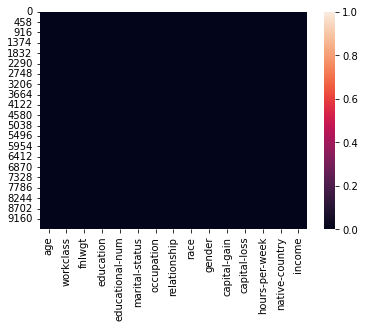

In [ ]:
# also use heatmap

sns.heatmap(data.isnull())

In [ ]:
data.tail(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
9595,24,Private,114292,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0.0,0.0,40.0,United-States,<=50K
9596,32,Private,227608,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
9597,21,State-gov,185554,Some-college,10,Never-married,Other-service,Own-child,White,Female,0.0,0.0,11.0,United-States,<=50K
9598,46,Self-emp-not-inc,181372,Bachelors,13,Never-married,Farming-fishing,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
9599,19,Private,344592,HS-grad,9,Never-married,Sales,Not-in-family,Black,Female,0.0,0.0,35.0,United-States,<=50K
9600,29,Self-emp-not-inc,102326,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
9601,43,Self-emp-not-inc,220647,Bachelors,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,2377.0,50.0,United-States,<=50K
9602,18,?,30246,11th,7,Never-married,?,Own-child,White,Female,0.0,0.0,45.0,United-States,<=50K
9603,33,Private,496743,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,88.0,United-States,<=50K
9604,21,Private,161508,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K


In [ ]:
data.isin(['?']).sum()

age                  0
workclass          584
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation         585
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     164
income               0
dtype: int64

In [ ]:
import numpy as np
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
data['workclass'] = data['workclass'].replace('?', np.nan)
data['occupation'] = data['occupation'].replace('?', np.nan)
data['native-country'] = data['native-country'].replace('?', np.nan)

In [ ]:
data.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
data.isnull().sum()

age                  0
workclass          584
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation         585
relationship         0
race                 1
gender               1
capital-gain         1
capital-loss         1
hours-per-week       1
native-country     165
income               1
dtype: int64

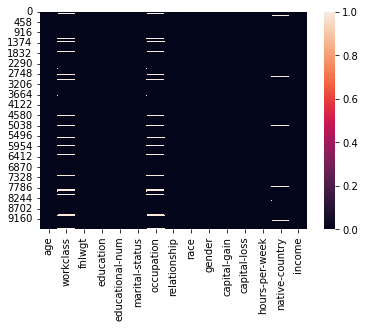

In [ ]:
sns.heatmap(data.isnull())

### 5. Drop all The Missing Values

In [ ]:
pct_missing = data.isnull().sum()*100/len(data)
pct_missing

age                0.000000
workclass          6.073843
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         6.084243
relationship       0.000000
race               0.010400
gender             0.010400
capital-gain       0.010400
capital-loss       0.010400
hours-per-week     0.010400
native-country     1.716069
income             0.010400
dtype: float64

In [ ]:
# drop na rows 
data.dropna(how='any', inplace=True)
data.shape

(8877, 15)

In [ ]:
48842 - 45222

3620

### 6. Check For Duplicate Data and Drop Them

In [ ]:
dup = data.duplicated().any()
dup

True

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(8876, 15)

In [ ]:
45222 - 45175
# 47 duplicated rows are dropped 

47

### 7. Get Overall Statistics About The Dataframe

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,8876.0,NaN,NaN,NaN,38.660545,13.366109,17.0,28.0,37.0,48.0,90.0
workclass,8876,7,Private,6463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,8876.0,NaN,NaN,NaN,188323.654011,105065.533057,13769.0,115648.25,177920.0,237429.0,1490400.0
education,8876,16,HS-grad,2914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educational-num,8876.0,NaN,NaN,NaN,10.122465,2.551683,1.0,9.0,10.0,13.0,16.0
marital-status,8876,7,Married-civ-spouse,4056,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,8876,14,Exec-managerial,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,8876,6,Husband,3607,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,8876,5,White,7675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,8876,2,Male,5971,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 8. Drop The Columns education-num, capital-gain and capital-loss 

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
# Unique values inside education column
data['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [ ]:
data['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1])

In [ ]:
data = data.drop(['educational-num', 'capital-gain', 'capital-loss'], axis=1)

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

## Univariate Analysis


### 9. What Is The Distribution of Age Column?

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [ ]:
data['age'].describe()

count    8876.000000
mean       38.660545
std        13.366109
min        17.000000
25%        28.000000
50%        37.000000
75%        48.000000
max        90.000000
Name: age, dtype: float64

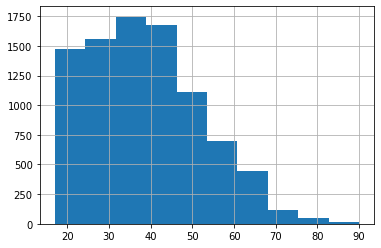

In [ ]:
data['age'].hist()

### 10. Find Total number of persons having age between 17 - 48 Inclusively. * Using between method 

In [ ]:
sum((data['age'] >= 17) & (data['age'] <=48))

6819

In [ ]:
sum(data['age'].between(17,48))

6819

### 11. What is The Distribution of  workclass Column?

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

In [ ]:
data['workclass'].describe()

count        8876
unique          7
top       Private
freq         6463
Name: workclass, dtype: object

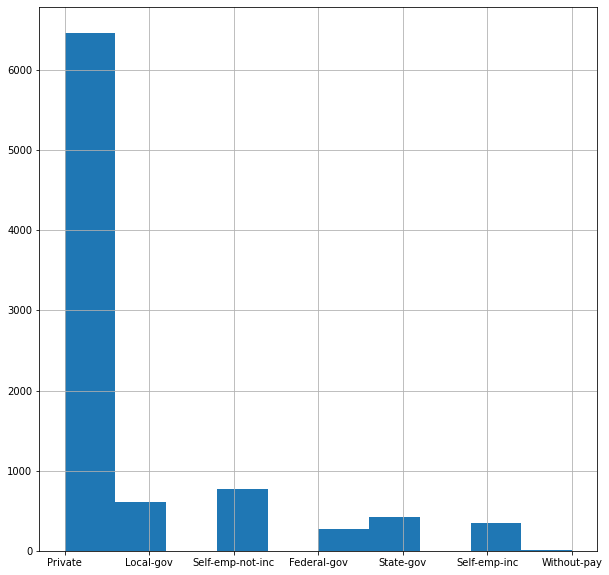

In [ ]:
# use => plt.figure(figsize=(n,n)) to sizing the plot
plt.figure(figsize=(10,10))
data['workclass'].hist()

### How many people having Bachelors and Masters Degree

In [ ]:
filter1 = data['education'] == 'Bachelors'
filter2 = data['education'] == 'Masters'

In [ ]:
len(data[filter1 | filter2])

2028

In [ ]:
sum(data['education'].isin(['Bachelors', 'Masters']))

2028

### Bivariate Analysis

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

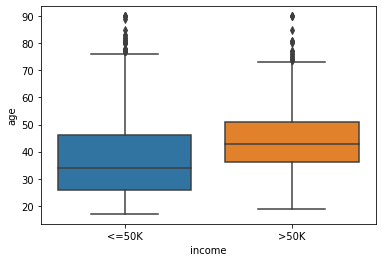

In [ ]:
sns.boxplot(x='income', y='age', data=data)

In [ ]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
data['income'].value_counts()

<=50K    6699
>50K     2177
Name: income, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


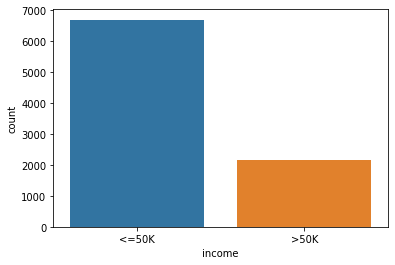

In [ ]:
sns.countplot('income', data=data)

In [ ]:
def income_data(inc):
  if inc == '<=50K':
    return 0
  else :
    return 1 

In [ ]:
data['encoded_data'] = data['income'].apply(income_data)
data.head(1)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,encoded_data
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40.0,United-States,<=50K,0


In [ ]:
# use replace(to_replace)
data.replace(to_replace=['<=50K', '>50K'], value= [ 0, 1], inplace=True )
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,encoded_data
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40.0,United-States,0,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50.0,United-States,0,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40.0,United-States,1,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40.0,United-States,1,1
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,30.0,United-States,0,0


In [ ]:
data.groupby('workclass')['income'].mean().sort_values(ascending=False)

workclass
Self-emp-inc        0.548851
Federal-gov         0.397059
Local-gov           0.282645
State-gov           0.270335
Without-pay         0.250000
Self-emp-not-inc    0.249347
Private             0.216927
Name: income, dtype: float64

### 12.How Has Better Change To Get Salary >50K Male or Female ?


In [ ]:
data.groupby('gender')['income'].mean().sort_values(ascending=False)

gender
Male      0.308324
Female    0.115663
Name: income, dtype: float64

### Convert workclass column datatype to category datatype 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8876 entries, 0 to 9613
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             8876 non-null   int64  
 1   workclass       8876 non-null   object 
 2   fnlwgt          8876 non-null   int64  
 3   education       8876 non-null   object 
 4   marital-status  8876 non-null   object 
 5   occupation      8876 non-null   object 
 6   relationship    8876 non-null   object 
 7   race            8876 non-null   object 
 8   gender          8876 non-null   object 
 9   hours-per-week  8876 non-null   float64
 10  native-country  8876 non-null   object 
 11  income          8876 non-null   int64  
 12  encoded_data    8876 non-null   int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [ ]:
data['workclass'] = data['workclass'].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8876 entries, 0 to 9613
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             8876 non-null   int64   
 1   workclass       8876 non-null   category
 2   fnlwgt          8876 non-null   int64   
 3   education       8876 non-null   object  
 4   marital-status  8876 non-null   object  
 5   occupation      8876 non-null   object  
 6   relationship    8876 non-null   object  
 7   race            8876 non-null   object  
 8   gender          8876 non-null   object  
 9   hours-per-week  8876 non-null   float64 
 10  native-country  8876 non-null   object  
 11  income          8876 non-null   int64   
 12  encoded_data    8876 non-null   int64   
dtypes: category(1), float64(1), int64(4), object(7)
memory usage: 1.1+ MB
